In [2]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

from gensim import corpora
from gensim.models import LsiModel

from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/louis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/louis/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
def read_file(file_name):
    with open(file_name) as f:
        lines = f.readlines()
    return lines

path = './data/book_text'

text = read_file(path)
text = ' '.join(text)
# split into paragraphs
paragraphs = text.split('\n \n')
paragraphs = [p.strip().replace('\n','') for p in paragraphs if len(p) > 0] # remove empty paragraphs

paragraphs[3]

'The year 1866 was signalised by a remarkable incident, a mysterious and puzzling phenomenon, which doubtless no one has yet forgotten. Not to mention rumours which agitated the maritime population and excited the public mind, even in the interior of continents, seafaring men were particularly excited. Merchants, common sailors, captains of vessels, skippers, both of Europe and America, naval officers of all countries, and the Governments of several states on the two continents, were deeply interested in the matter.'

In [4]:
def preprocess_data(doc_set):
    tokenizer = RegexpTokenizer(r'\w+')
    en_stop = set(stopwords.words('english'))
    p_stemmer = PorterStemmer()
    texts = []

    for i in doc_set:
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        stopped_tokens = [i for i in tokens if not i in en_stop]
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        texts.append(stemmed_tokens)
    return texts

In [5]:
def prepare_corpus(clean_docs):
    dictionary = corpora.Dictionary(clean_docs)
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in clean_docs]
    return dictionary,doc_term_matrix

Number of topics =  1
Number of topics =  2
Number of topics =  3
Number of topics =  4
Number of topics =  5
Number of topics =  6
Number of topics =  7
Number of topics =  8
Number of topics =  9


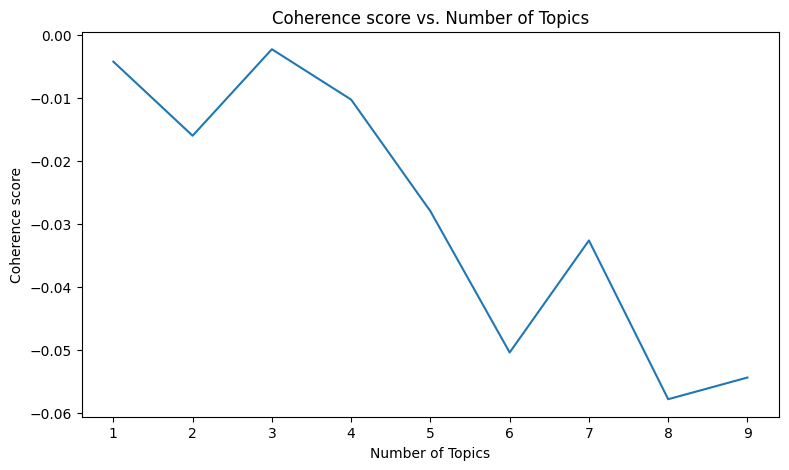

In [110]:
# https://www.datacamp.com/tutorial/discovering-hidden-topics-python
clean_docs=preprocess_data(paragraphs)
dictionary,doc_term_matrix=prepare_corpus(clean_docs)

# set a seed for reproducibility
np.random.seed(1)

def topic_modeling(doc_term_matrix,number_of_topics,words_nb):
    
    lsa_topic_model  = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary, random_seed=2)

    coherencemodel = CoherenceModel(model=lsa_topic_model, texts=clean_docs, dictionary=dictionary, coherence='c_npmi')
    
    topic_words = lsa_topic_model.print_topics(num_topics=number_of_topics, num_words=words_nb)

    return [coherencemodel.get_coherence(),topic_words]

import numpy as np
number_of_topics=  np.arange(1,10,1)                      
words_nb = 10

topic_results = []

for topic in number_of_topics:
    print('Number of topics = ',topic)
    topic_results.append(topic_modeling(doc_term_matrix,topic,words_nb))

# plot the coherence score
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9,5))
plt.plot(number_of_topics, [i[0] for i in topic_results]) 
plt.title('Coherence score vs. Number of Topics')  
plt.xlabel('Number of Topics')
plt.ylabel('Coherence score')
# save the plot as a file
fig.savefig('./plots/topic_modeling_lsa_.png')

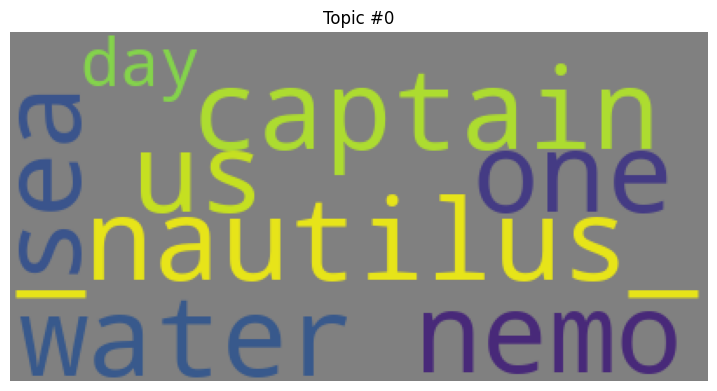

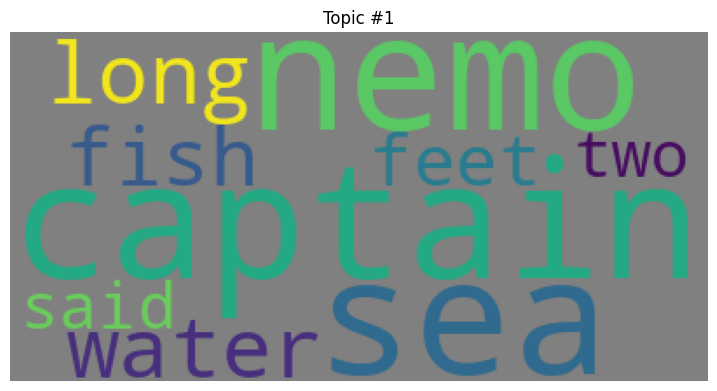

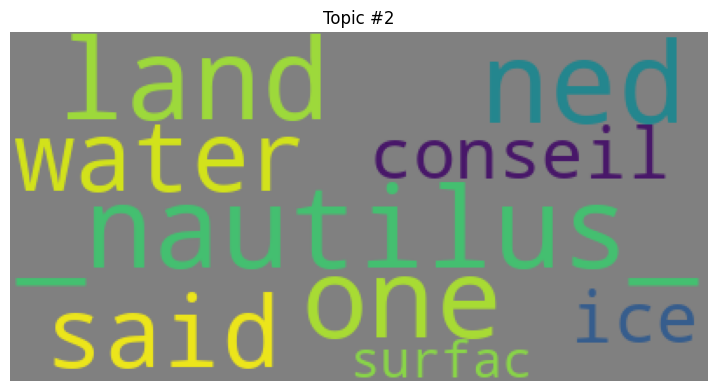

In [111]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# print the topics with word clouds
topic_results.sort(key=lambda x: x[0], reverse=True)
best = topic_results[0]
for topic in best[1]:
    fig = plt.figure(figsize=(9,5))
    plt.imshow(WordCloud(background_color="gray").generate(topic[1]))
    plt.axis("off")
    plt.title("Topic #" + str(topic[0]))
    plt.show()
    # save the plot as a file
    fig.savefig('./plots/topic_modeling_lsa_topic_'+str(topic[0])+'.png')

# NMF 

Number of topics =  2
Number of topics =  3
Number of topics =  4
Number of topics =  5
Number of topics =  6
Number of topics =  7
Number of topics =  8
Number of topics =  9
Number of topics =  10
Number of topics =  11
Number of topics =  12
Number of topics =  13
Number of topics =  14


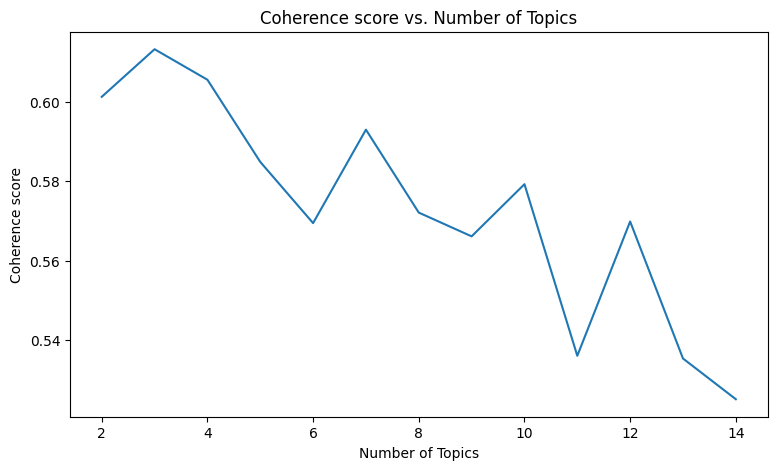

In [10]:
from gensim.models import Nmf 


# https://www.datacamp.com/tutorial/discovering-hidden-topics-python
clean_docs=preprocess_data(paragraphs)
dictionary,doc_term_matrix=prepare_corpus(clean_docs)


def topic_modeling_nmf(doc_term_matrix,number_of_topics,words_nb):
    
    nmf_topic_model = Nmf(
        corpus = doc_term_matrix,     
        id2word = dictionary,   
        num_topics =number_of_topics,     
        random_state = 100,
        passes = 20,      
        )
    coherencemodel = CoherenceModel(model=nmf_topic_model, texts=clean_docs, dictionary=dictionary, coherence='c_v')
    
    topic_words = []
    for topic_num, words in nmf_topic_model.show_topics():
        topic_words.append(words[:words_nb])
        
    topic_words = nmf_topic_model.print_topics(num_topics=number_of_topics, num_words=words_nb)

    return [coherencemodel.get_coherence(),topic_words]

import numpy as np
number_of_topics=  np.arange(2,15,1)                      
words_nb = 10

topic_results = []

for topic in number_of_topics:
    print('Number of topics = ',topic)
    topic_results.append(topic_modeling_nmf(doc_term_matrix,topic,words_nb))

# plot the coherence score
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9,5))
plt.plot(number_of_topics, [i[0] for i in topic_results]) 
plt.title('Coherence score vs. Number of Topics')  
plt.xlabel('Number of Topics')
plt.ylabel('Coherence score')
# save the plot as a file
fig.savefig('./plots/topic_modeling_nmf_.png')

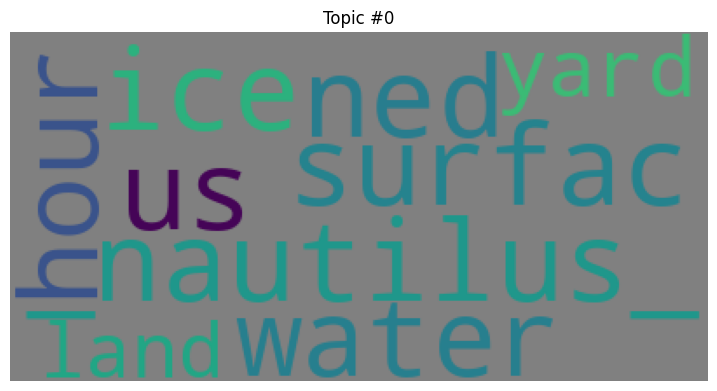

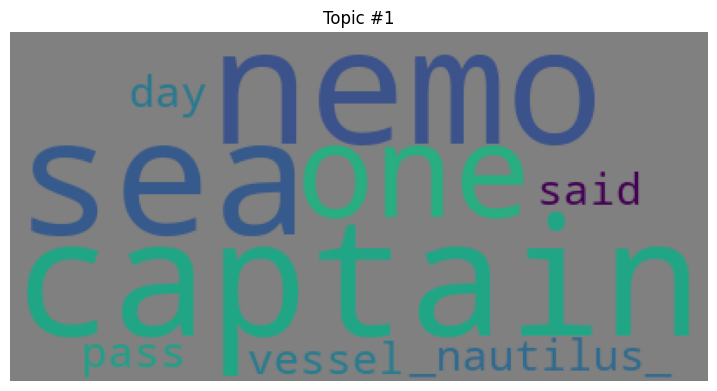

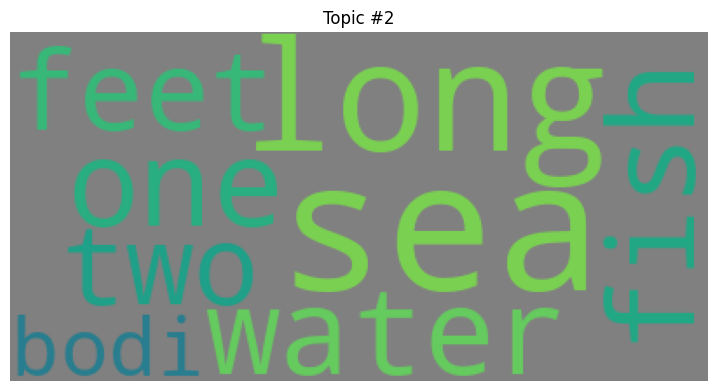

In [11]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# print the topics with word clouds
topic_results.sort(key=lambda x: x[0], reverse=True)
best = topic_results[0]
for topic in best[1]:
    fig = plt.figure(figsize=(9,5))
    plt.imshow(WordCloud(background_color="gray").generate(topic[1]))
    plt.axis("off")
    plt.title("Topic #" + str(topic[0]))
    plt.show()
    # save the plot as a file
    fig.savefig('./plots/topic_modeling_lsa_topic_'+str(topic[0])+'.png')